
# Mini Reto 005 del grupo Python para Trading

# Indicadores - Cruce de medias moviles simples (SMA)

El objetivo de este mini reto es utilizar el indicador de SMA (Simple Moving Average) o media móvil simple, para hacer una estrategía simple de trading, con la que obtener señales de compra y venta.

El objetivo de este reto es:

- Conocer el indicador SMA y saber aplicarlo a los precios de una acción.
- Aplicar dos medias, rapida y lenta, para identificar los cruces.
- Detectar los cruces para generar señaes de compra y venta.

Para ello, partiendo del código que hay a continuación, se pide realizar los siguientes pasos:

1) Calcular en la columna `slow_SMA` y `fast_SMA` los valores correspondientes respecto a la columna `Close`

2) Detectar los cruces creando una columna `long_signal` y otra `short_signal` que valgan True cuando se produzca el cruce de medias y False el resto de los períodos.

3) Pintar en una gráfica el precio `Close` las medias rapidas y lentas `slow_SMA` `fast_SMA` y las señales de compra `long_signal` y venta `short_signal` en forma de triangulo, tal y como se indica en la siguiente imagen de resultado.

![Resultado](Resultado.png)


### Partir de el siguiente código

In [1]:
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
import yfinance as yf

In [2]:
fast_SMA = 9
slow_SMA = 30
aapl = yf.download('AAPL', '2020-1-1','2020-10-25')

[*********************100%***********************]  1 of 1 completed


## Solución de [Fly](https://t.me/Flydos)

In [ ]:
# Creamos las medias:
aapl["slow_SMA"] = aapl["Close"].rolling(slow_SMA).mean()
aapl["fast_SMA"] = aapl["Close"].rolling(fast_SMA).mean()

In [71]:
# Generamos las señales de cruce: Tanto daría si hacemo < o >, sólo tenemos que vigilar con el signo
aapl["signals"] = np.where(aapl["slow_SMA"]>aapl["fast_SMA"],
                          -1,
                          0)

# Aplicamos diff para ver los cambios:
aapl["signals"] = aapl["signals"].diff(1)

# Donde hay 1, serán compras
aapl["buys"] = np.where(aapl["signals"] == 1,
                       True,
                       False)

# Donde hay -1, se venderá
aapl["sells"] = np.where(aapl["signals"] == -1,
                       True,
                       False)

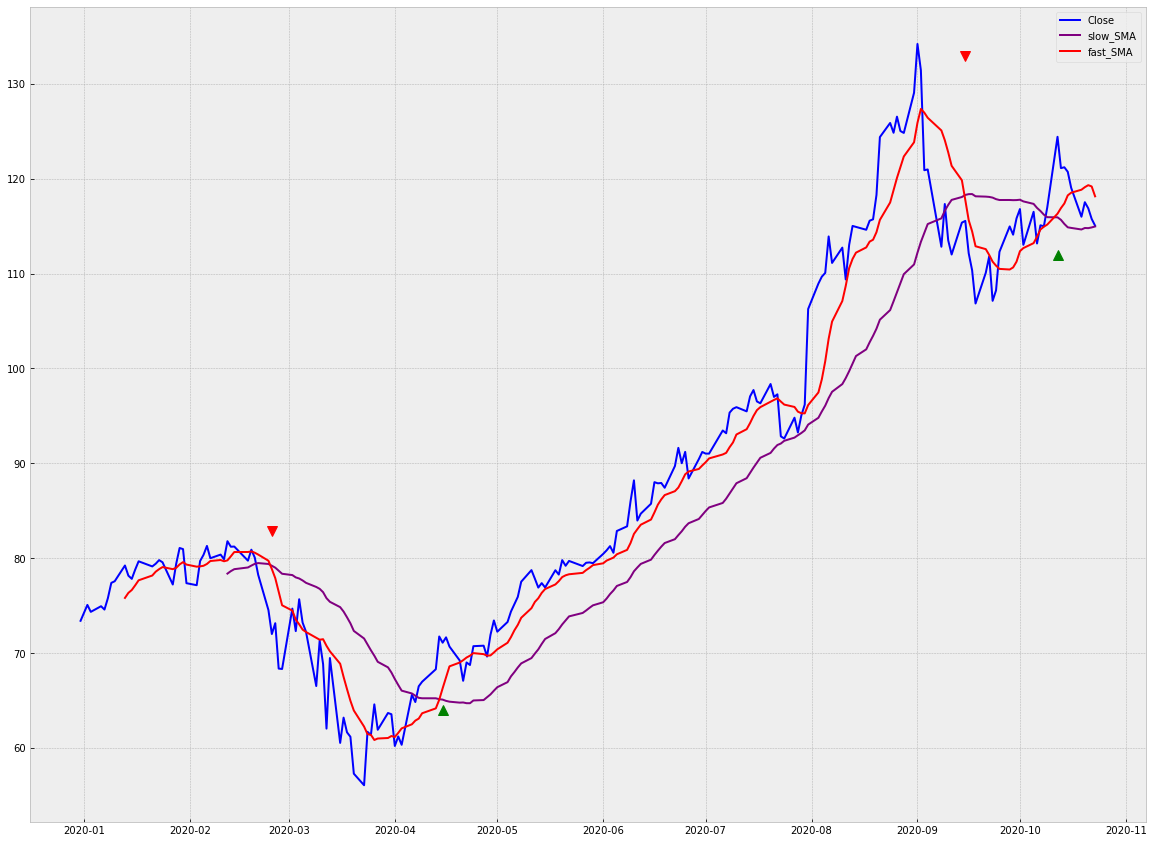

In [70]:
# Y mostramos los datos:
# Definimos la figura
fig = plt.figure(figsize=(20,15))

# Inicializamos los ejes
ax = plt.axes()

# Pintamos las medias y el cierre
ax.plot(aapl["Close"], color = "blue", label = "Close")
ax.plot(aapl["slow_SMA"], color = "purple", label ="slow_SMA")
ax.plot(aapl["fast_SMA"], color = "red", label = "fast_SMA")

# Las señales de compra y venta (multiplicamos por 0.9 y 1.15 para que no se muestren justo encima del cierre)
ax.plot(aapl["buys"][aapl["buys"] == True].index, aapl["Close"][aapl["buys"] == True]*0.90, '^', markersize=10, color='g')
ax.plot(aapl["sells"][aapl["sells"] == True].index, aapl["Close"][aapl["sells"] == True]*1.15, 'v', markersize=10, color='red')

# La leyenda...
plt.legend()

# Y finalmente ploteamos:
plt.show()